## EDA & Cleaning: Exploring continuous features

Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

This dataset contains information about 891 people who were on board the ship when departed on April 15th, 1912. As noted in the description on Kaggle's website, some people aboard the ship were more likely to survive the wreck than others. There were not enough lifeboats for everybody so women, children, and the upper-class were prioritized. Using the information about these 891 passengers, the challenge is to build a model to predict which people would survive based on the following fields:

- **Name** (str) - Name of the passenger
- **Pclass** (int) - Ticket class
- **Sex** (str) - Sex of the passenger
- **Age** (float) - Age in years
- **SibSp** (int) - Number of siblings and spouses aboard
- **Parch** (int) - Number of parents and children aboard
- **Ticket** (str) - Ticket number
- **Fare** (float) - Passenger fare
- **Cabin** (str) - Cabin number
- **Embarked** (str) - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

### Read in data

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

titanic_df = pd.read_csv("dataset/titanic/titanic.csv")
titanic = titanic_df.copy()
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [2]:
# Drop all categorical features
cat_feat = ['PassengerId', 'Name', 'Ticket', 'Sex', 'Cabin', 'Embarked']

titanic.drop(cat_feat, axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


### Explore continuous features

In [3]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
titanic.groupby("Survived").mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


In [5]:
titanic.groupby(titanic["Age"].isnull()).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,
False,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


### Plot continuous features

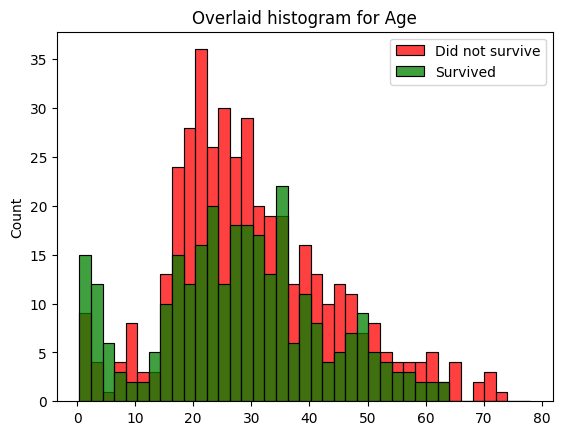

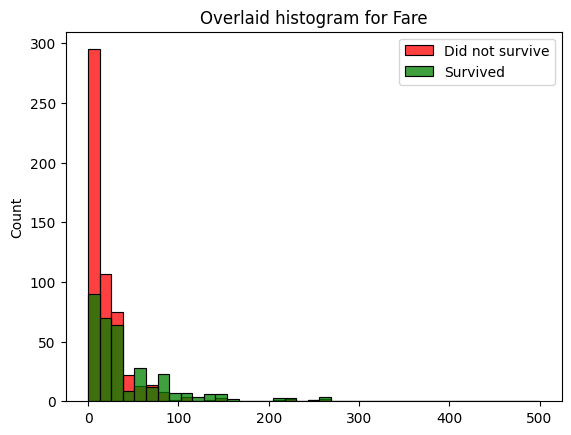

In [6]:
for i in ['Age', 'Fare']:
    died = list(titanic[titanic['Survived'] == 0][i].dropna())
    survived = list(titanic[titanic['Survived'] == 1][i].dropna())
    xmin = min(min(died), min(survived))
    xmax = max(max(died), max(survived))
    width = (xmax - xmin) / 40
    sns.histplot(died, color='r', kde=False, bins=np.arange(xmin, xmax, width))
    sns.histplot(survived, color='g', kde=False, bins=np.arange(xmin, xmax, width))
    plt.legend(['Did not survive', 'Survived'])
    plt.title('Overlaid histogram for {}'.format(i))
    plt.show()

<Figure size 640x480 with 0 Axes>

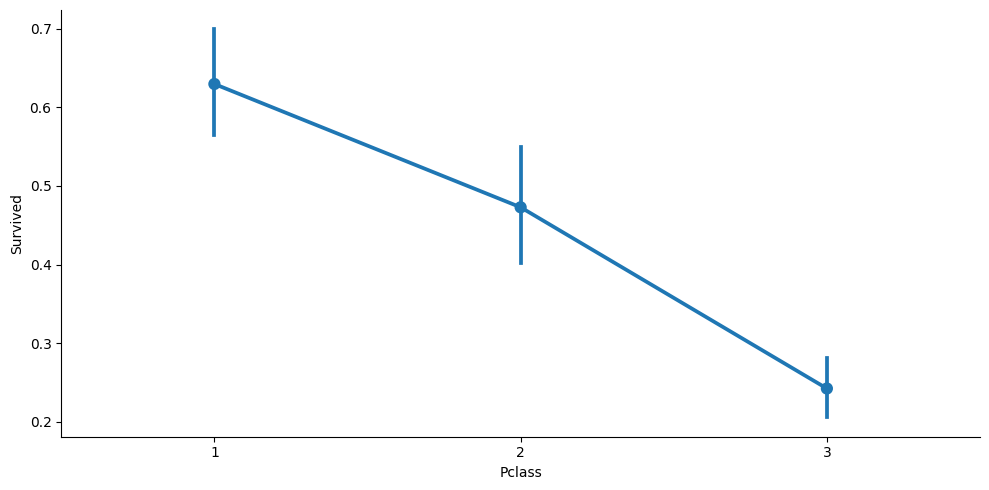

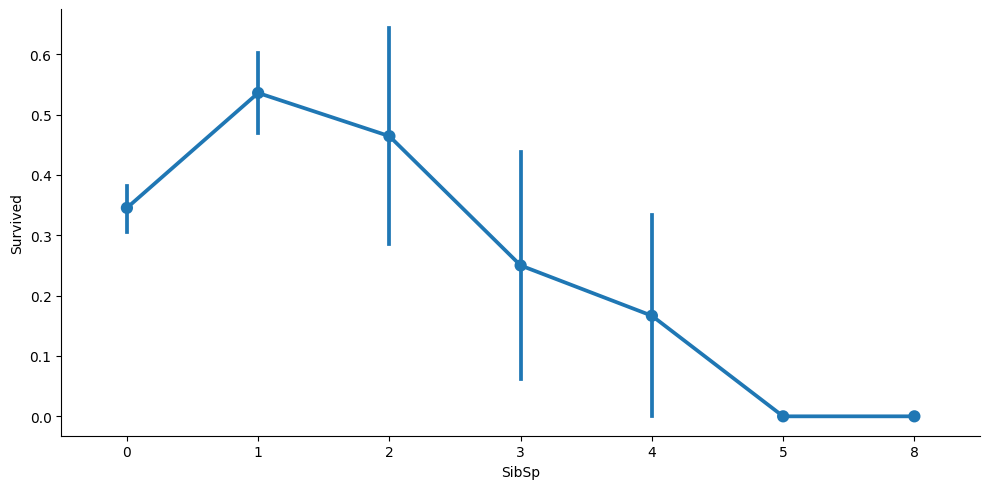

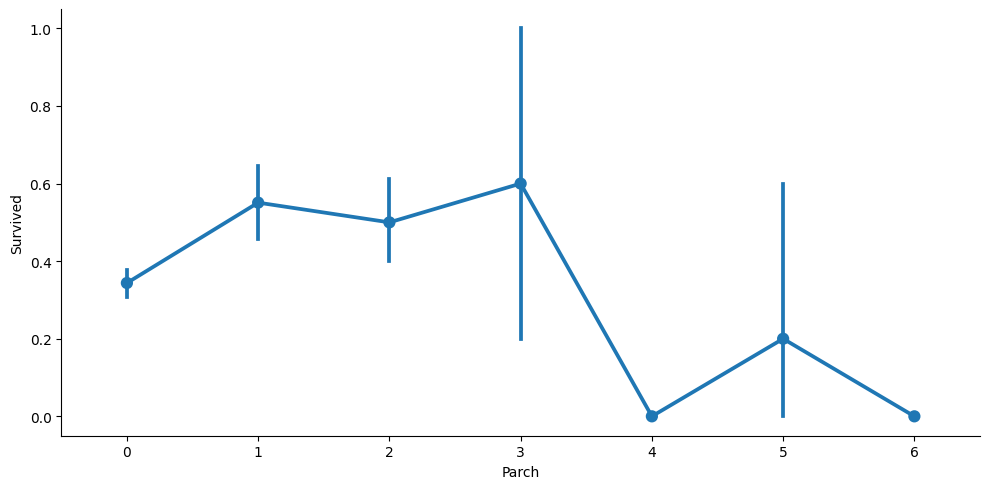

In [7]:
for i, col in enumerate(["Pclass", "SibSp", "Parch"]):
    plt.figure(i)
    sns.catplot(x=col, y="Survived", data=titanic, kind="point", aspect=2,)

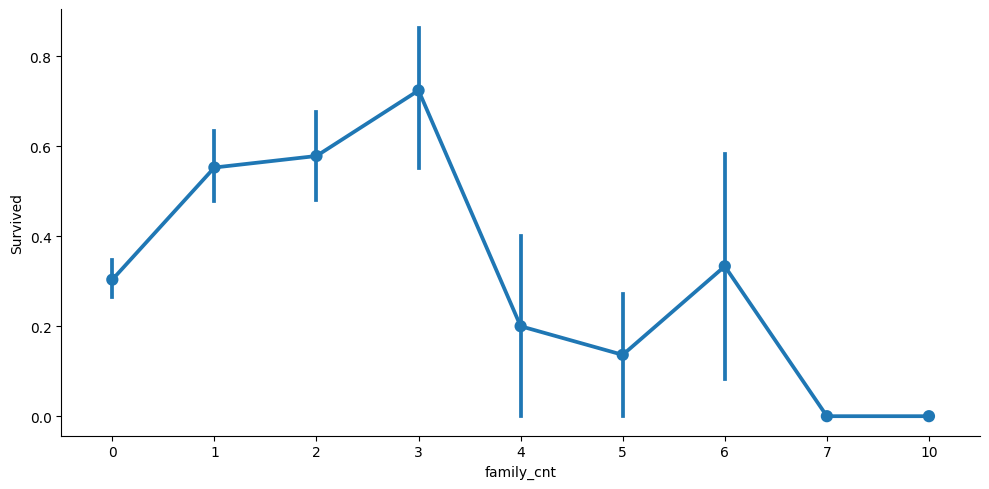

In [8]:
titanic['family_cnt'] = titanic["SibSp"] + titanic["Parch"]
sns.catplot(x='family_cnt', y='Survived', data=titanic, kind='point', aspect=2,)

In [9]:
titanic_v2 = titanic_df.copy()

titanic_v2.drop(["PassengerId"], axis=1, inplace=True)
titanic_v2.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Fill missing for Age

In [10]:
titanic_v2.groupby(titanic_v2["Age"].isnull()).mean(numeric_only=True)

,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,
False,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


In [11]:
titanic_v2["Age"].fillna(titanic_v2["Age"].mean(), inplace=True)
titanic_v2.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [12]:
titanic_v2["Family_cnt"] = titanic_v2["SibSp"] + titanic_v2["Parch"]
titanic_v2.drop(["SibSp", "Parch"], axis=1, inplace=True)
titanic_v2.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


In [13]:
cont_feat = ["Age", "Fare", "Name", "Family_cnt", "Pclass"]
titanic_v2.drop(cont_feat, axis=1, inplace=True)
titanic_v2.head()

,Survived,Sex,Ticket,Cabin,Embarked
0,0,male,A/5 21171,NaN,S
1,1,female,PC 17599,C85,C
2,1,female,STON/O2. 3101282,NaN,S
3,1,female,113803,C123,S
4,0,male,373450,NaN,S


In [14]:
titanic_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Sex       891 non-null    object
 2   Ticket    891 non-null    object
 3   Cabin     204 non-null    object
 4   Embarked  889 non-null    object
dtypes: int64(1), object(4)
memory usage: 34.9+ KB


In [15]:
titanic_v2.groupby(titanic_v2["Cabin"].isnull()).mean(numeric_only=True)

,Survived
Cabin,
False,0.666667
True,0.299854


In [16]:
titanic_v2["Cabin_ind"] = np.where(titanic_v2["Cabin"].isnull(), 0, 1)

In [17]:
titanic_v2

,Survived,Sex,Ticket,Cabin,Embarked,Cabin_ind
0,0,male,A/5 21171,NaN,S,0
1,1,female,PC 17599,C85,C,1
2,1,female,STON/O2. 3101282,NaN,S,0
3,1,female,113803,C123,S,1
4,0,male,373450,NaN,S,0
...,...,...,...,...,...,...
886,0,male,211536,NaN,S,0
887,1,female,112053,B42,S,1
888,0,female,W./C. 6607,NaN,S,0
889,1,male,111369,C148,C,1


### Plot categorical features

<Figure size 640x480 with 0 Axes>

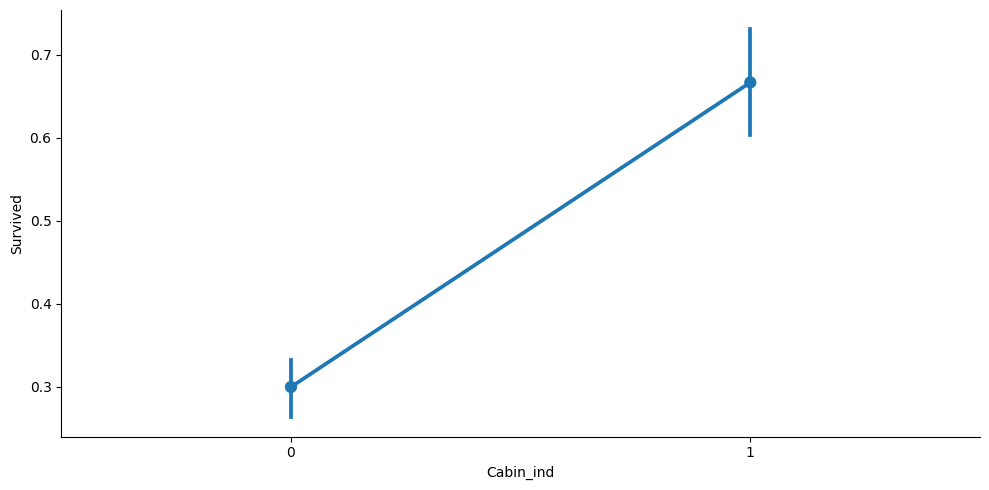

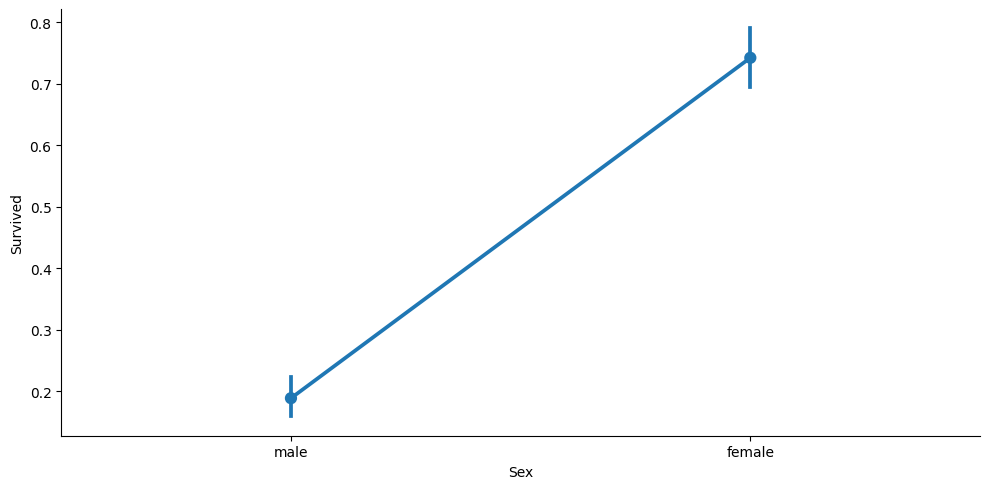

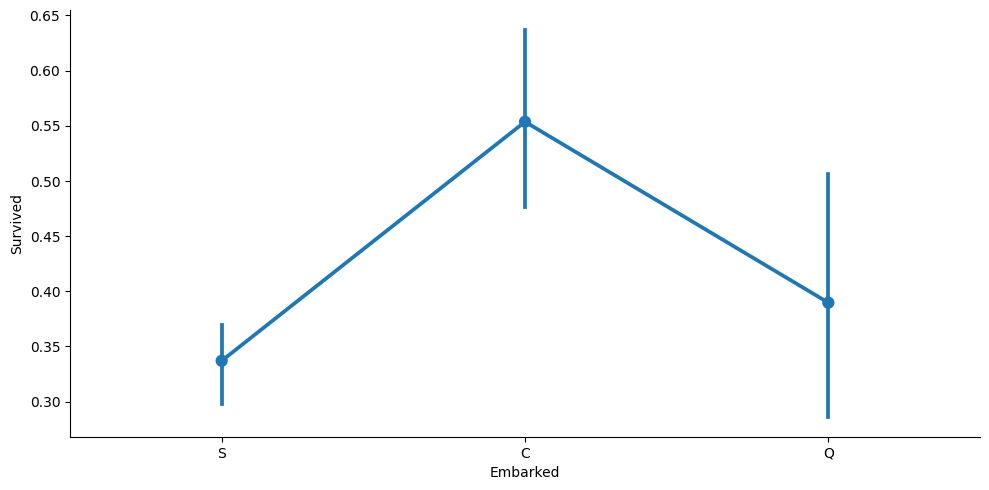

In [18]:
for i, col in enumerate(["Cabin_ind", "Sex", "Embarked"]):
    plt.figure(i)
    sns.catplot(x=col, y="Survived", data=titanic_v2, kind="point", aspect=2,)

In [19]:
titanic_v2.pivot_table("Survived", index="Sex", columns="Embarked", aggfunc="count")

Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441


In [20]:
titanic_v2.pivot_table("Survived", index="Cabin_ind", columns="Embarked", aggfunc="count")

Embarked,C,Q,S
Cabin_ind,,,
0,99,73,515
1,69,4,129


### Clean categorical data

In [21]:
titanic_v3 = titanic_df.copy()
titanic_v3.drop(["Name", "Ticket"], axis=1, inplace=True)
titanic_v3.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


In [23]:
titanic_v3["Cabin_ind"] = np.where(titanic_v3["Cabin"].isnull(), 0, 1)
titanic_v3.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_ind
0,1,0,3,male,22.0,1,0,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,71.2833,C85,C,1
2,3,1,3,female,26.0,0,0,7.9250,NaN,S,0
3,4,1,1,female,35.0,1,0,53.1000,C123,S,1
4,5,0,3,male,35.0,0,0,8.0500,NaN,S,0


In [26]:
gender_num = {
    "male": 0,
    "female": 1
}

titanic_v3["Sex"] = titanic_v3["Sex"].map(gender_num)
titanic_v3.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_ind
0,1,0,3,0,22.0,1,0,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,71.2833,C85,C,1
2,3,1,3,1,26.0,0,0,7.9250,NaN,S,0
3,4,1,1,1,35.0,1,0,53.1000,C123,S,1
4,5,0,3,0,35.0,0,0,8.0500,NaN,S,0


In [27]:
titanic_v3.drop(["Cabin", "Embarked"], axis=1, inplace=True)
titanic_v3.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_ind
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,1
4,5,0,3,0,35.0,0,0,8.0500,0


## Pipeline

In [35]:
titanic["Age"].fillna(titanic["Age"].mean(), inplace=True)
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


#### Combine `SibSp` & `Parch`

<Figure size 640x480 with 0 Axes>

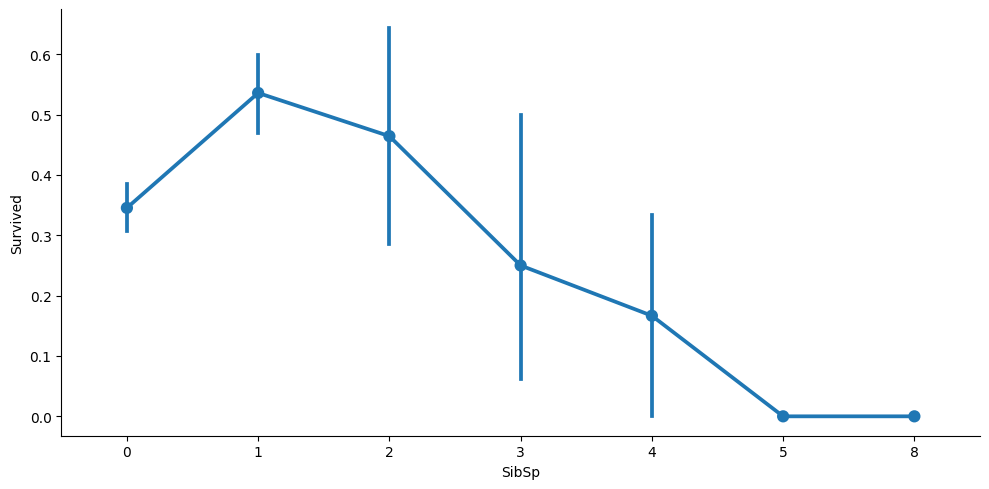

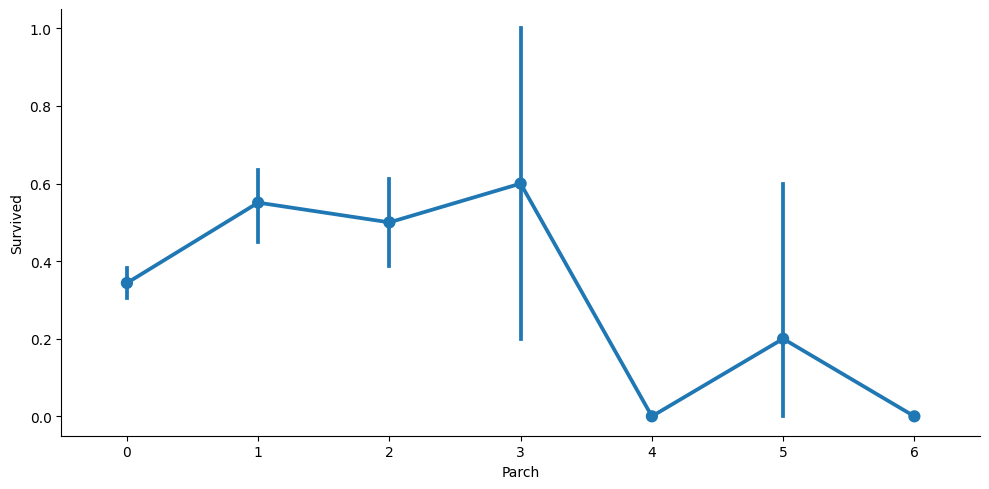

In [36]:
for i, col in enumerate(["SibSp", "Parch"]):
    plt.figure(i)
    sns.catplot(x=col, y="Survived", data=titanic, kind="point", aspect=2,)

In [38]:
titanic["Family_count"] = titanic["SibSp"] + titanic["Parch"]
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_count
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


#### Drop unnecessary columns

In [39]:
titanic.drop(["SibSp", "Parch", "PassengerId"], axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_count
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


In [40]:
titanic.to_csv("dataset/titanic/titanic_cleaned.csv", index=False)

#### Clean categorical variables

In [41]:
titanic["Cabin_indicator"] = np.where(titanic["Cabin"].isnull(), 0, 1)
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_count,Cabin_indicator
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0,0


In [42]:
gender_num = {
    "male": 0,
    "female": 1
}

titanic["Sex"] = titanic["Sex"].map(gender_num)
titanic.head()


,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_count,Cabin_indicator
0,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,NaN,S,0,0


In [46]:
titanic.drop(["Cabin", "Embarked", "Name", "Ticket"], axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Family_count,Cabin_indicator
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


In [47]:
titanic.to_csv("dataset/titanic/titanic_cleaned.csv", index=False)

### train test val split

In [48]:
features_df = titanic.drop("Survived", axis=1)
labels_df = titanic["Survived"]

X_train, X_test, Y_train, Y_test = train_test_split(
    features_df, labels_df, test_size=0.4, random_state=14)
X_test, X_val, Y_test, Y_val = train_test_split(
    X_test, Y_test, test_size=0.5, random_state=14)


In [49]:
print(" Total number of passengers: {}".format(len(titanic_v3)))
print("Training set has {} samples.".format(Y_train.shape[0]))
print("Validation set has {} samples.".format(Y_val.shape[0]))
print("Testing set has {} samples.".format(Y_test.shape[0]))

 Total number of passengers: 891
Training set has 534 samples.
Validation set has 179 samples.
Testing set has 178 samples.


In [55]:
for dataset in (Y_train, Y_val, Y_test):
    print(round(len(dataset) / len(labels_df), 2))

0.6
0.2
0.2


#### Write out data

In [56]:
X_train.to_csv("dataset/titanic/train_features.csv", index=False)
X_val.to_csv("dataset/titanic/val_features.csv", index=False)
X_test.to_csv("dataset/titanic/test_features.csv", index=False)

Y_train.to_csv("dataset/titanic/train_labels.csv", index=False)
Y_val.to_csv("dataset/titanic/val_labels.csv", index=False)
Y_test.to_csv("dataset/titanic/test_labels.csv", index=False)
